In [1]:
import pandas as pd
data=pd.read_csv('iris.data')
x = data.iloc[:,:4]

In [4]:
x.head(5)

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pydotplus

In [6]:
    mpl.rcParams['font.sans-serif'] = ['simHei']
    mpl.rcParams['axes.unicode_minus'] = False

    iris_feature_E = 'sepal length', 'sepal width', 'petal length', 'petal width'
    iris_feature = '花萼长度', '花萼宽度', '花瓣长度', '花瓣宽度'
    iris_class = 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'


    path = 'iris.data'  # 数据文件路径
    data = pd.read_csv(path)
    x= data.iloc[:,:4]
    y = pd.Categorical(data['iris_class']).codes
    

In [7]:
    # 为了可视化，仅使用前两列特征
    x = x.iloc[:, :2]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
    model = DecisionTreeClassifier()
    model.fit(x_train, y_train)
    y_test_hat = model.predict(x_test)      # 测试数据
    print('accuracy_score:', accuracy_score(y_test, y_test_hat))

accuracy_score: 0.6


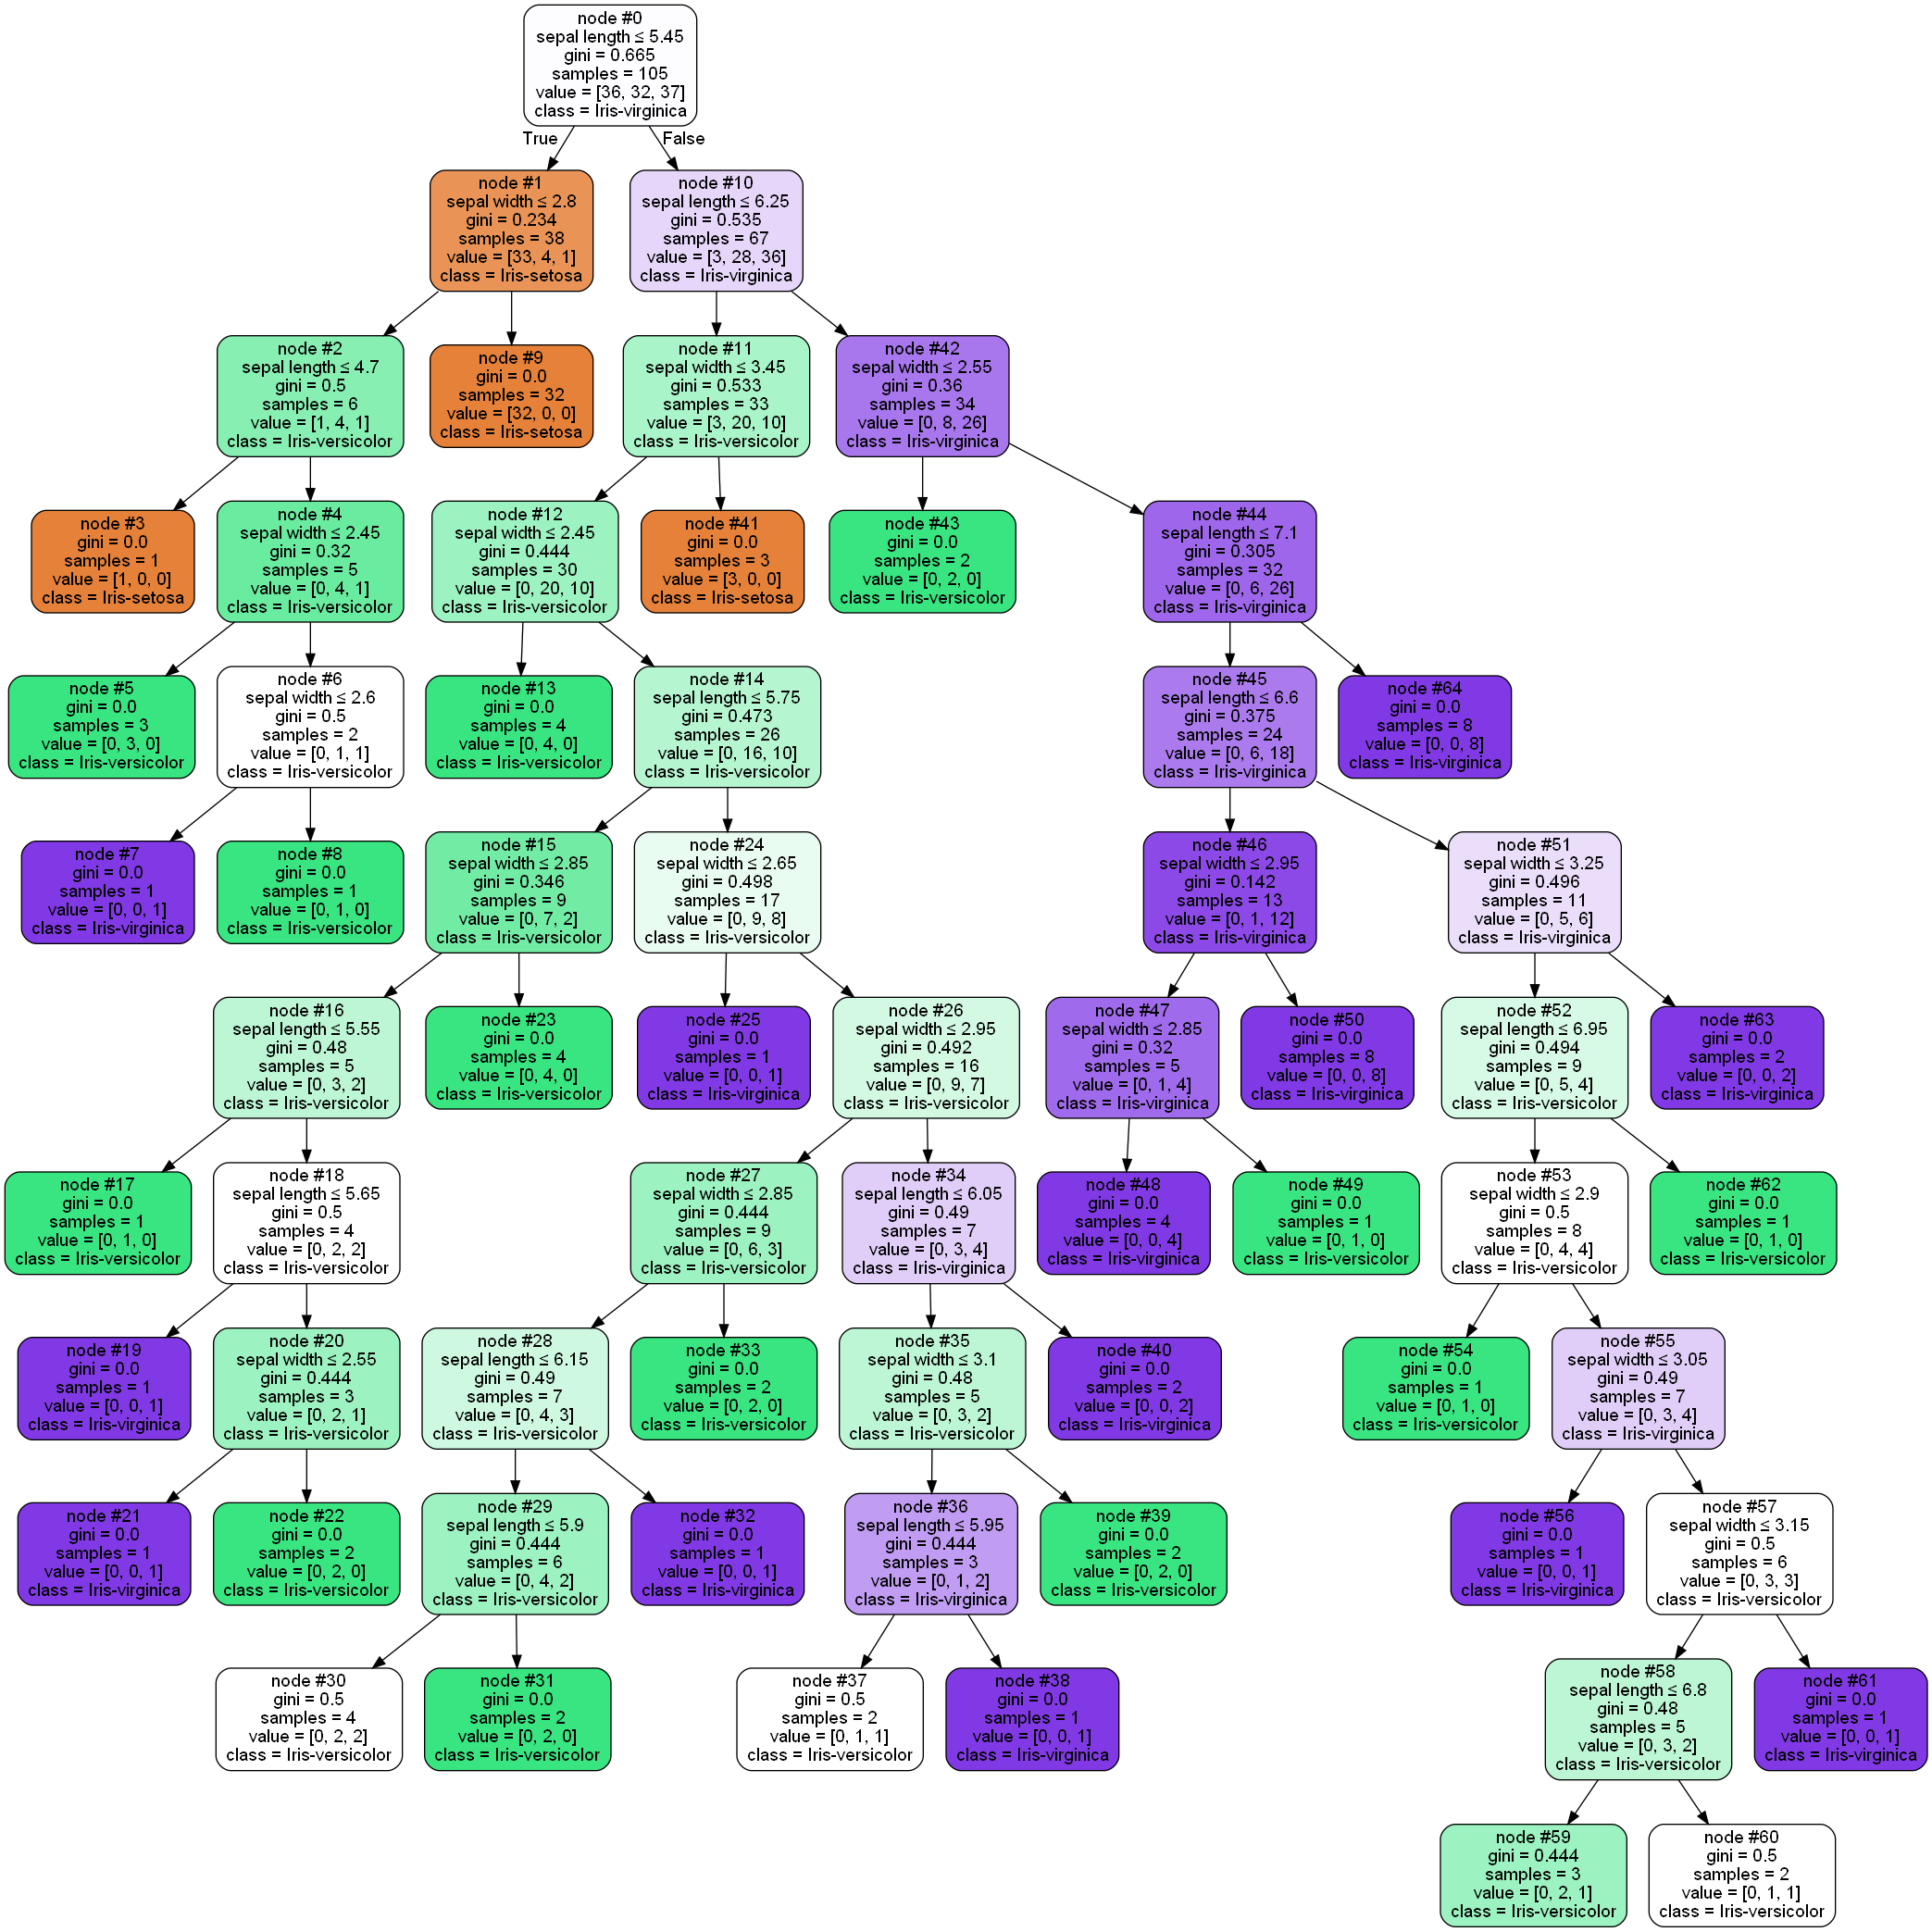

In [8]:
    # 保存
    # dot -Tpng iris.dot -o iris.png 
    # 1、输出
#     with open('iris.dot', 'w') as f:
#         tree.export_graphviz(model, out_file=f)

    # 2、给定文件名
    # tree.export_graphviz(model, out_file='iris1.dot')

    # 3、输出为pdf格式
#     dot_data = tree.export_graphviz(model, out_file=None, feature_names=iris_feature_E[0:2], class_names=iris_class,
#                                     filled=True, rounded=True, special_characters=True)
#     graph = pydotplus.graph_from_dot_data(dot_data)
#     graph.write_pdf('iris.pdf')
#     f = open('iris.png', 'wb')
#     f.write(graph.create_png())
#     f.close()

"""若输出返回值dot_data,则out_file必须为None,故要预先export_graphviz一遍生成iris.dot,因此推荐下面方法，简单高效"""
    tree.export_graphviz(model, out_file='iris.dot', feature_names=iris_feature_E[0:2], class_names=iris_class,\
                                    node_ids=True,filled=True, rounded=True, special_characters=True)
    
    # 用系统命令转为PNG和PDF文件(需要 Graphviz)
    from subprocess import call
    call(['dot', '-Tpng', 'iris.dot', '-o', 'iris.png'])
    call(['dot', '-Tpdf', 'iris.dot', '-o', 'iris.pdf'])

    from IPython.display import Image
    Image(filename = 'iris.png')

In [9]:
    # 画图
    N,M = 50,50  
    # 横纵各采样多少个值
    x1_min, x2_min = x.min()
    x1_max, x2_max = x.max()
    t1 = np.linspace(x1_min, x1_max, N)
    t2 = np.linspace(x2_min, x2_max, M)
    x1, x2 = np.meshgrid(t1, t2)  # 生成网格采样点
    x_show = np.stack((x1.flat, x2.flat), axis=1)  # 测试点
#     flat返回的是一个迭代器
    print(x_show.shape)

(2500, 2)


In [12]:
x1

array([[4.3       , 4.37346939, 4.44693878, ..., 7.75306122, 7.82653061,
        7.9       ],
       [4.3       , 4.37346939, 4.44693878, ..., 7.75306122, 7.82653061,
        7.9       ],
       [4.3       , 4.37346939, 4.44693878, ..., 7.75306122, 7.82653061,
        7.9       ],
       ...,
       [4.3       , 4.37346939, 4.44693878, ..., 7.75306122, 7.82653061,
        7.9       ],
       [4.3       , 4.37346939, 4.44693878, ..., 7.75306122, 7.82653061,
        7.9       ],
       [4.3       , 4.37346939, 4.44693878, ..., 7.75306122, 7.82653061,
        7.9       ]])

In [53]:
    cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
    cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
    y_show_hat = model.predict(x_show)  # 预测值
    print(y_show_hat.shape)
    print(y_show_hat)
    y_show_hat = y_show_hat.reshape(x1.shape)  # 使之与输入的形状相同
    print(y_show_hat)

(2500,)
[0 0 0 ... 2 2 2]
[[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]]


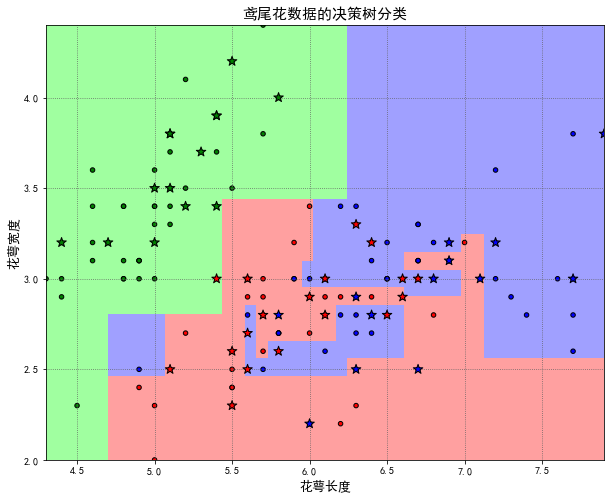

In [94]:
    plt.figure(figsize=(10,8),facecolor='w')
    plt.pcolormesh(x1, x2, y_show_hat, cmap=cm_light,shading='auto')  # 预测值的显示
    plt.scatter(x_test[iris_feature_E[0]], x_test[iris_feature_E[1]],\
                c=y_test.ravel(), edgecolors='k', s=100, zorder=10, cmap=cm_dark, marker='*')  # 测试数据
    """具有更高 zorder 画在上面,默认一般优先级如下"""
    plt.scatter(x[iris_feature_E[0]], x[iris_feature_E[1]],\
                c=y.ravel(), edgecolors='k', s=20, cmap=cm_dark)  # 全部数据
    plt.xlabel(iris_feature[0], fontsize=13)
    plt.ylabel(iris_feature[1], fontsize=13)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.grid(b=True, ls=':', color='#606060')
    plt.title('鸢尾花数据的决策树分类', fontsize=15)
    plt.show()

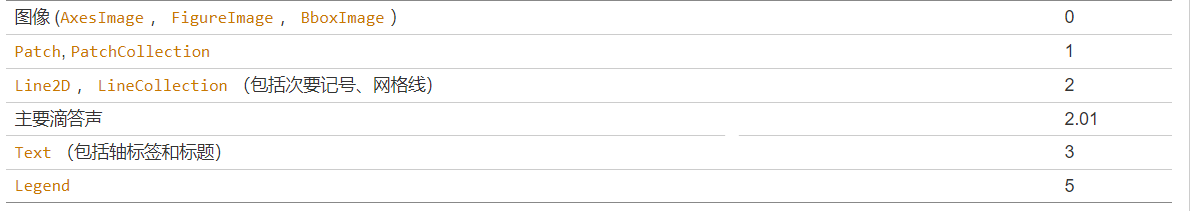

In [111]:
# 训练集上的预测结果
y_test = y_test.reshape(-1)
print(y_test_hat)
print(y_test)
result = (y_test_hat == y_test)   # True则预测正确，False则预测错误
acc = np.mean(result)
print('准确度: %.2f%%' % (100 * acc))

[0 1 2 0 2 2 1 0 0 2 2 0 1 2 1 0 2 1 0 0 1 0 2 0 2 1 0 0 1 1 2 2 2 2 1 0 1
 0 2 1 2 0 1 1 1]
[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 2 2 1]
准确度: 62.22%


1  错误率: 44.44%
2  错误率: 24.44%
3  错误率: 24.44%
4  错误率: 24.44%
5  错误率: 26.67%
6  错误率: 33.33%
7  错误率: 35.56%
8  错误率: 35.56%
9  错误率: 42.22%
10  错误率: 40.00%
11  错误率: 40.00%
12  错误率: 37.78%
13  错误率: 37.78%
14  错误率: 35.56%


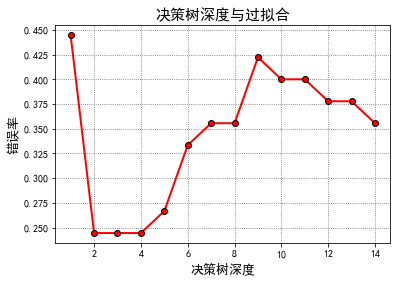

In [112]:
    # 过拟合：错误率
    depth = np.arange(1, 15)
    err_list = []
    for d in depth:
        clf = DecisionTreeClassifier( max_depth=d)
        clf.fit(x_train, y_train)
        y_test_hat = clf.predict(x_test)  # 测试数据
        result = (y_test_hat == y_test)  # True则预测正确，False则预测错误
        err = 1 - np.mean(result)
        err_list.append(err)
        print(d, ' 错误率: %.2f%%' % (100 * err))
    plt.figure(facecolor='w')
    plt.plot(depth, err_list, 'ro-', markeredgecolor='k', lw=2)
    plt.xlabel('决策树深度', fontsize=13)
    plt.ylabel('错误率', fontsize=13)
    plt.title('决策树深度与过拟合', fontsize=15)
    plt.grid(b=True, ls=':', color='#606060')
    plt.show()